In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = "/Users/benpfeffer/Library/Mobile Documents/com~apple~CloudDocs/projects-portfolio-main/5-octobre/"
order = pd.read_csv(f"{PATH}/data/cleaned/order.csv")
cart = pd.read_csv(f"{PATH}/data/cleaned/cart.csv")


In [2]:
order.dtypes

id                 int64
Référence         object
Nouveau client     int64
Livraison         object
Client            object
Total             object
Paiement          object
État              object
Date              object
dtype: object

In [3]:
order['Date'] = pd.to_datetime(order['Date'])
order['Total'] = order['Total'].str.replace("€", "")
order['Total'] = order['Total'].str.replace("$", "")

order['Total'] = order['Total'].str.strip().str.replace(",", ".").str.replace("\xa0", "")  # Add this replacement
order['Total'] = order['Total'].astype(float)

cart['Date'] = pd.to_datetime(cart['Date'])

In [4]:
order.dtypes

id                         int64
Référence                 object
Nouveau client             int64
Livraison                 object
Client                    object
Total                    float64
Paiement                  object
État                      object
Date              datetime64[ns]
dtype: object

In [5]:
order.head()

,id,Référence,Nouveau client,Livraison,Client,Total,Paiement,État,Date
0,468,EOCSEVOVW,1,Lituanie,K. Kybartaite,205.0,Card via Stripe,Livré,2022-04-29 12:52:00
1,467,YKNOEEZEX,1,Suisse,F. zanni,1542.0,Card via Stripe,Livré,2022-04-28 21:22:45
2,466,LHCRAEYPL,1,Belgique,O. Voortman,780.0,Transfert bancaire,Livré,2022-04-26 13:57:29
3,465,IVTTHQOYH,1,France,R. Jeanjean,480.0,Card via Stripe,Livré,2022-04-25 20:52:39
4,464,FQDTAFHIK,1,Suisse,A. Kiialainen,208.0,Card via Stripe,Livré,2022-04-20 23:22:20


In [6]:
order_df = pd.DataFrame()
for client in order['Client']:
    if client != "L. Pfeffer":
        order_df = pd.concat([order_df, order[order['Client'] == client]])

order_df.head()

,id,Référence,Nouveau client,Livraison,Client,Total,Paiement,État,Date
0,468,EOCSEVOVW,1,Lituanie,K. Kybartaite,205.0,Card via Stripe,Livré,2022-04-29 12:52:00
1,467,YKNOEEZEX,1,Suisse,F. zanni,1542.0,Card via Stripe,Livré,2022-04-28 21:22:45
555,1381,XEBMJRTDN,0,Suisse,F. zanni,1930.0,Card via Stripe,Livré,2024-10-31 22:33:28
625,1311,WIVYIOTXU,0,Suisse,F. zanni,730.0,Card via Stripe,Livré,2024-08-28 00:10:01
657,1279,PTWPSLNJA,0,Suisse,F. zanni,1910.0,Card via Stripe,Livré,2024-07-01 18:55:41


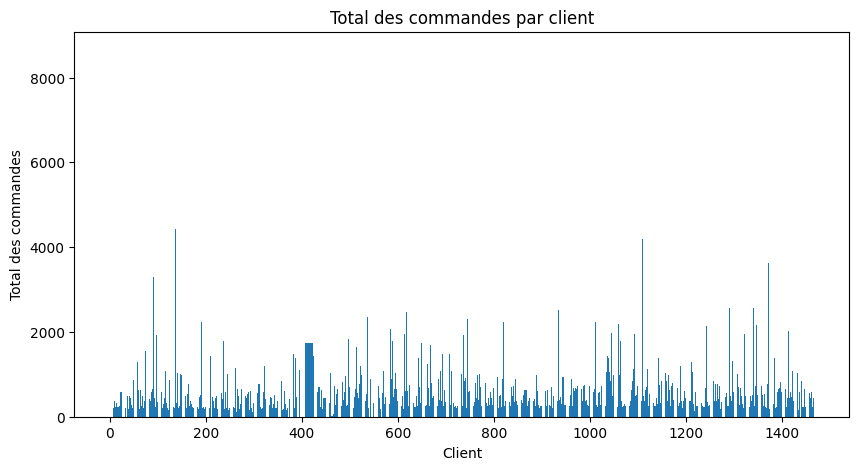

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(order_df.index, order_df['Total'])
plt.title("Total des commandes par client")
plt.xlabel("Client")
plt.ylabel("Total des commandes")
plt.show()

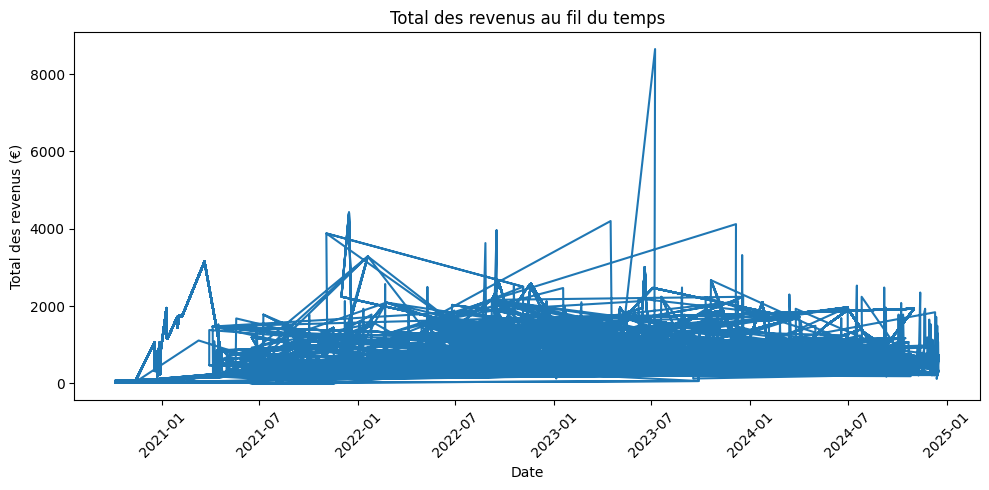

In [32]:
# Total revenue over time

plt.figure(figsize=(10, 5))
plt.plot(order_df['Date'], order_df['Total'])
plt.title("Total des revenus au fil du temps")
plt.xlabel("Date")
plt.ylabel("Total des revenus (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


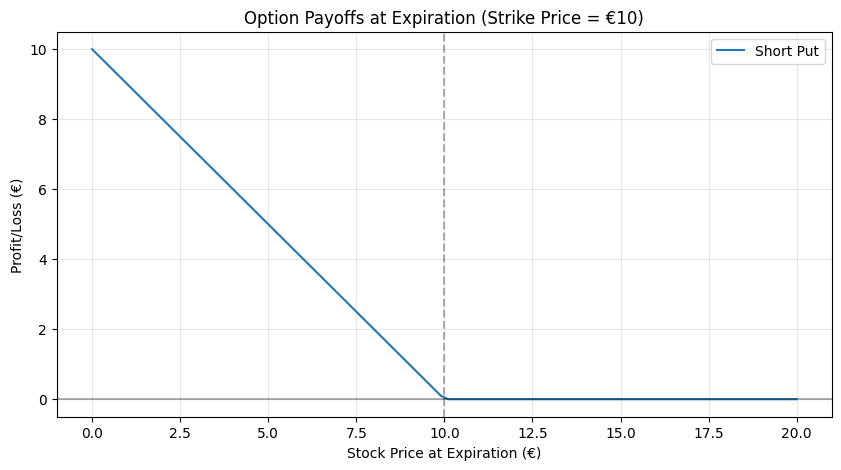

In [42]:
# Option payoff diagrams
# Strike price = €10, Expiration = 6 months

# Generate stock prices from 0 to 20 euros
stock_prices = np.linspace(0, 20, 100)

# Calculate payoffs
strike_price = 10

# Short call payoff = min(Strike - Stock Price, 0)
short_call_payoff = np.minimum(strike_price - stock_prices, 0)

# Long call payoff = max(Stock Price - Strike, 0)
long_call_payoff = np.maximum(stock_prices - strike_price, 0)

# Short put payoff = min(Stock Price - Strike, 0)
short_put_payoff = np.minimum(stock_prices - strike_price, 0)

# Long put payoff = max(Strike - Stock Price, 0)
long_put_payoff = np.maximum(strike_price - stock_prices, 0)

# Create the plot
plt.figure(figsize=(10, 5))
#plt.plot(stock_prices, -short_call_payoff, label='Short Call')  # Negate to show loss/profit
#plt.plot(stock_prices, long_call_payoff, label='Long Call')
plt.plot(stock_prices, -short_put_payoff, label='Short Put')  # Negate to show loss/profit
#plt.plot(stock_prices, long_put_payoff, label='Long Put')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=strike_price, color='black', linestyle='--', alpha=0.3)

# Add labels and title
plt.title('Option Payoffs at Expiration (Strike Price = €10)')
plt.xlabel('Stock Price at Expiration (€)')
plt.ylabel('Profit/Loss (€)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


/var/folders/8p/tyj3gj5j7f54558fzrt60f700000gn/T/ipykernel_39466/2384287334.py:30: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/8p/tyj3gj5j7f54558fzrt60f700000gn/T/ipykernel_39466/2384287334.py:30: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.




Customer Insights Summary:
Monthly Customer Acquisition: 1330 customers
Geographic Distribution: France - 918 customers
Customer Lifetime Value: €10734.58
Average Purchase Frequency: 1.34 orders per customer


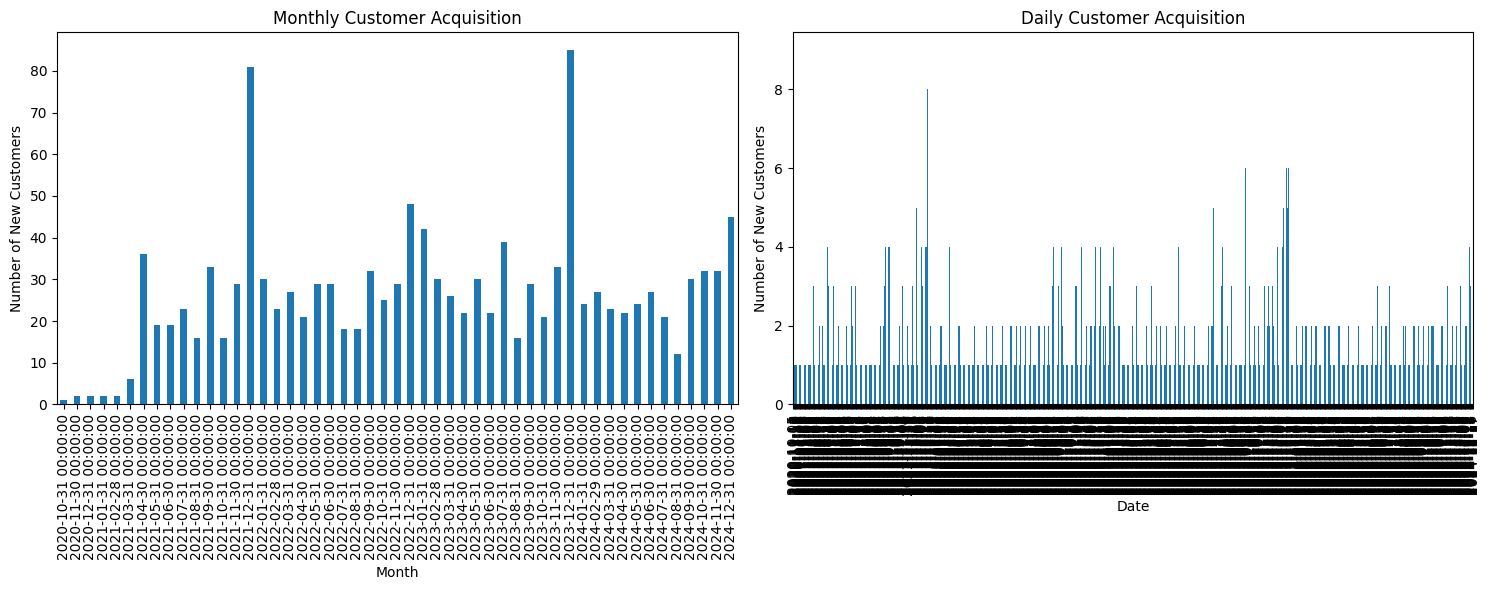

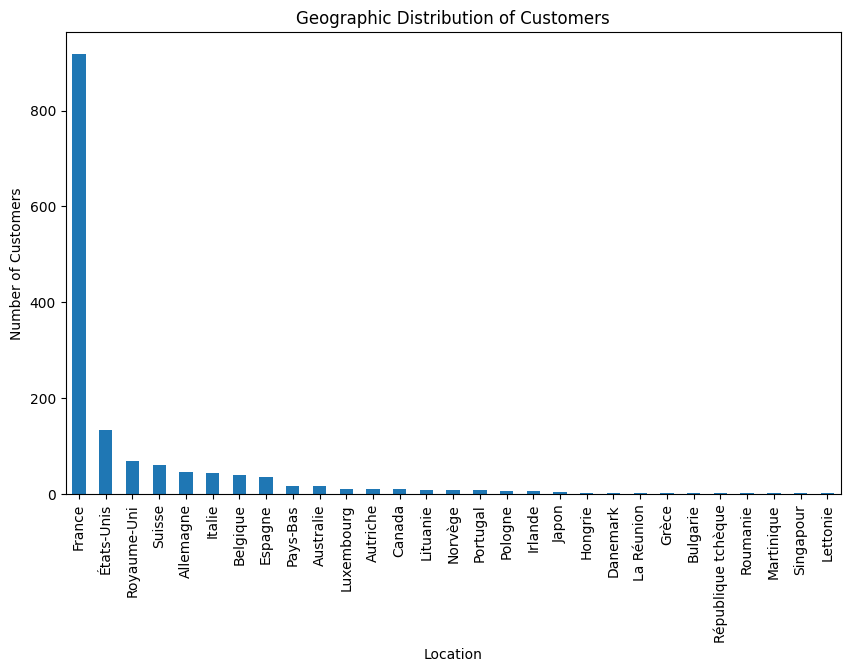

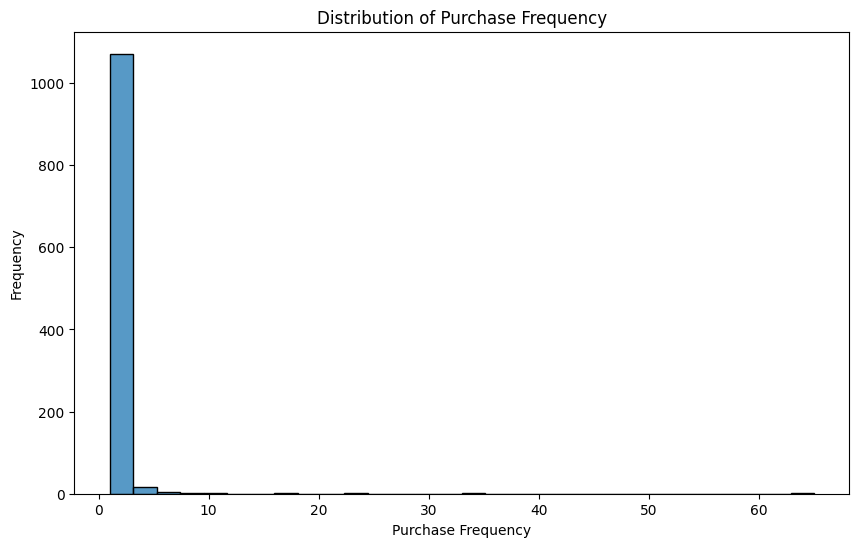

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class CustomerInsights:
    def __init__(self, orders_df):
        self.orders_df = self._preprocess_orders_data(orders_df)
        
    def _preprocess_orders_data(self, df):
        """Preprocess orders data"""
        # Convert date
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Clean currency values
        def clean_amount(x):
            if isinstance(x, str):
                amount = x.replace('€', '').replace('$', '').replace(' ', '').replace('\xa0', '')
                amount = amount.replace(',', '.')
                return float(amount)
            return x
        
        df['Total'] = df['Total'].apply(clean_amount)
        return df

    def analyze_customer_acquisition(self):
        """Analyze customer acquisition trends"""
        # Monthly customer acquisition
        monthly_acquisition = self.orders_df.groupby(pd.Grouper(key='Date', freq='M'))['Client'].nunique()
        
        # Daily customer acquisition
        daily_acquisition = self.orders_df.groupby(self.orders_df['Date'].dt.date)['Client'].nunique()
        
        return {
            'monthly_acquisition': monthly_acquisition,
            'daily_acquisition': daily_acquisition
        }

    def analyze_geographic_distribution(self):
        """Analyze geographic distribution of customers"""
        # Note: This depends on whether geographic data is available in your dataset
        # You might need to modify this based on your actual data structure
        geographic_distribution = self.orders_df['Livraison'].value_counts()
        return geographic_distribution

    def calculate_customer_lifetime_value(self):
        """Calculate customer lifetime value"""
        # Average order value
        avg_order_value = self.orders_df['Total'].mean()
        
        # Purchase frequency
        purchase_frequency = self.orders_df.groupby('Client')['Date'].count().mean()
        
        # Customer lifetime
        customer_lifetime = 12  # months, assuming an average customer lifetime of 1 year
        
        # Calculate CLV
        clv = avg_order_value * purchase_frequency * customer_lifetime
        
        return clv

    def analyze_purchase_frequency(self):
        """Analyze purchase frequency"""
        # Purchase frequency by customer
        purchase_frequency = self.orders_df.groupby('Client')['Date'].count()
        
        # Average purchase frequency
        avg_purchase_frequency = purchase_frequency.mean()
        
        return {
            'purchase_frequency': purchase_frequency,
            'avg_purchase_frequency': avg_purchase_frequency
        }

    def plot_customer_acquisition(self):
        """Create visualizations for customer acquisition"""
        acquisition_trends = self.analyze_customer_acquisition()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Monthly acquisition trend
        acquisition_trends['monthly_acquisition'].plot(kind='bar', ax=ax1)
        ax1.set_title('Monthly Customer Acquisition')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Number of New Customers')
        
        # Daily acquisition trend
        acquisition_trends['daily_acquisition'].plot(kind='bar', ax=ax2)
        ax2.set_title('Daily Customer Acquisition')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Number of New Customers')
        
        plt.tight_layout()
        return plt

    def plot_geographic_distribution(self):
        """Plot geographic distribution of customers"""
        geographic_distribution = self.analyze_geographic_distribution()
        
        plt.figure(figsize=(10, 6))
        geographic_distribution.plot(kind='bar')
        plt.title('Geographic Distribution of Customers')
        plt.xlabel('Location')
        plt.ylabel('Number of Customers')
        return plt

    def plot_purchase_frequency(self):
        """Plot purchase frequency distribution"""
        purchase_frequency = self.analyze_purchase_frequency()
        
        plt.figure(figsize=(10, 6))
        sns.histplot(data=purchase_frequency['purchase_frequency'], bins=30)
        plt.title('Distribution of Purchase Frequency')
        plt.xlabel('Purchase Frequency')
        plt.ylabel('Frequency')
        return plt

    def generate_summary_report(self):
        """Generate a comprehensive summary report"""
        acquisition_trends = self.analyze_customer_acquisition()
        geographic_distribution = self.analyze_geographic_distribution()
        clv = self.calculate_customer_lifetime_value()
        purchase_frequency = self.analyze_purchase_frequency()
        
        return {
            'acquisition_trends': acquisition_trends,
            'geographic_distribution': geographic_distribution,
            'clv': clv,
            'purchase_frequency': purchase_frequency
        }

def run_customer_insights(orders_path):
    """Main function to run customer insights analysis"""
    # Load data
    orders_df = pd.read_csv(orders_path)
    
    # Initialize analyzer
    analyzer = CustomerInsights(orders_df)
    
    # Generate report
    report = analyzer.generate_summary_report()
    
    # Create visualizations
    analyzer.plot_customer_acquisition()
    analyzer.plot_geographic_distribution()
    analyzer.plot_purchase_frequency()
    
    return report, analyzer

# Example usage:
if __name__ == "__main__":
    # Replace with actual file path
    orders_path = PATH + "data/cleaned/order.csv"
    
    # Run analysis
    report, analyzer = run_customer_insights(orders_path)
    
    # Print summary
    print("\nCustomer Insights Summary:")
    print(f"Monthly Customer Acquisition: {report['acquisition_trends']['monthly_acquisition'].sum()} customers")
    print(f"Geographic Distribution: {report['geographic_distribution'].index[0]} - {report['geographic_distribution'].values[0]} customers")
    print(f"Customer Lifetime Value: €{report['clv']:.2f}")
    print(f"Average Purchase Frequency: {report['purchase_frequency']['avg_purchase_frequency']:.2f} orders per customer")
    
    # Show plots
    plt.show()



Cart Analysis Summary:
Total Carts: 3000
Abandoned Carts: 2700
Abandonment Rate: 90.00%
Average Abandoned Cart Value: €942.42
Median Abandoned Cart Value: €270.00
Total Lost Value: €2544525.00


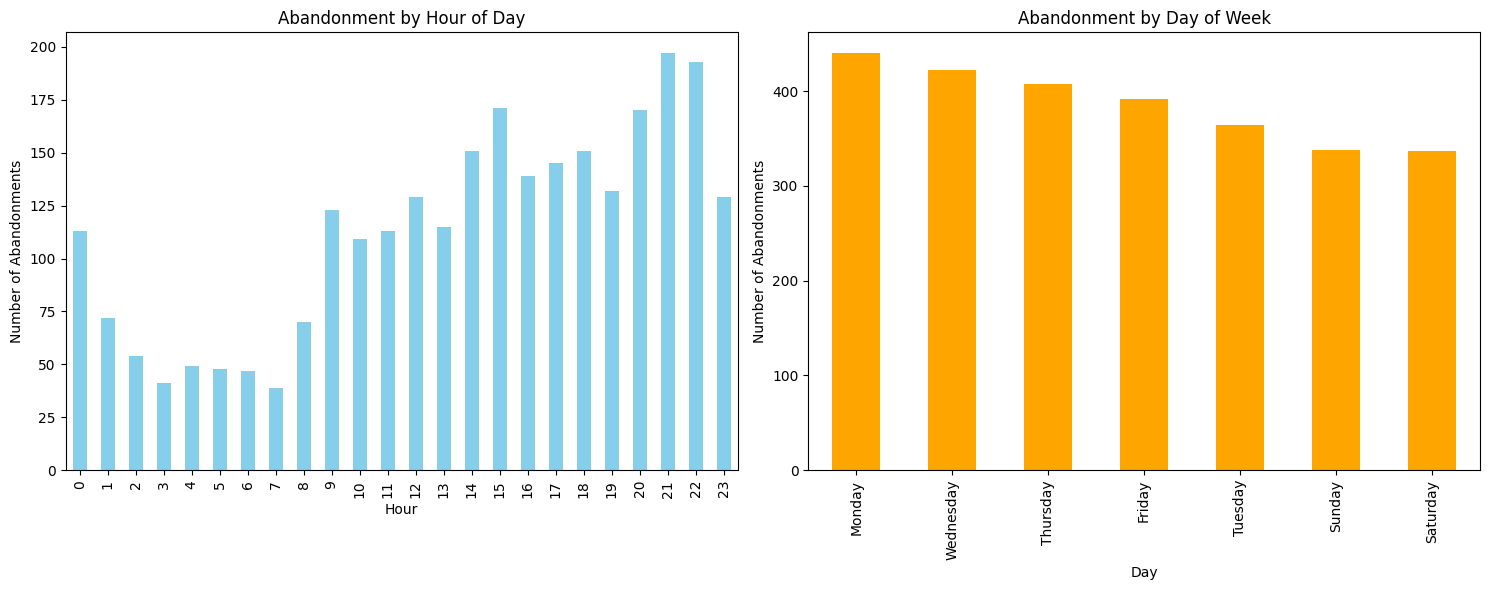

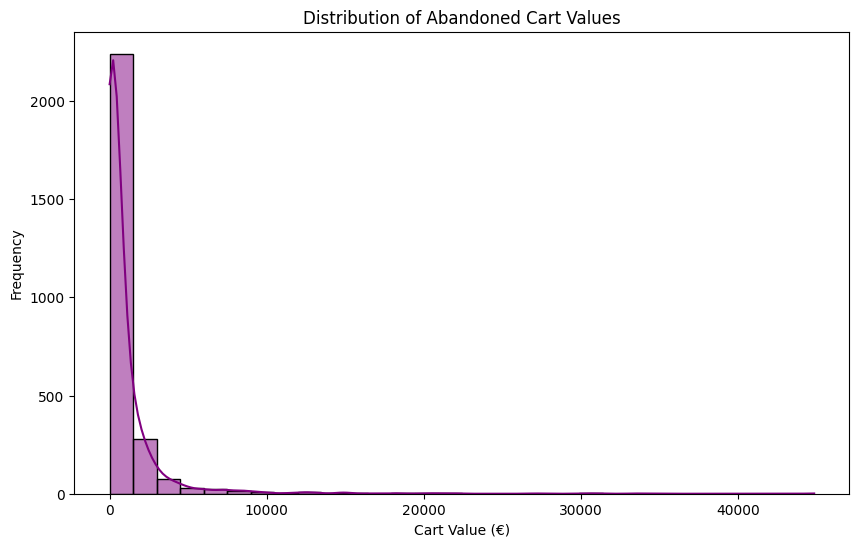

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Preprocessing
def load_and_preprocess_cart_data(cart_path):
    """
    Load and preprocess cart data.
    """
    cart_df = pd.read_csv(cart_path, parse_dates=['Date'])
    
    # Clean currency values in the 'Total' column
    def clean_amount(x):
        if isinstance(x, str):
            amount = x.replace('€', '').replace('$', '').replace(' ', '').replace('\xa0', '')
            amount = amount.replace(',', '.')
            return float(amount)
        return x
    
    cart_df['Total'] = cart_df['Total'].apply(clean_amount)
    return cart_df

# 2. Abandonment Rate Calculation
def calculate_abandonment_rate(cart_df):
    """
    Calculate cart abandonment rate.
    """
    total_carts = len(cart_df)
    abandoned_carts = len(cart_df[cart_df['ID commande'] == 'Panier abandonné'])
    abandonment_rate = (abandoned_carts / total_carts) * 100 if total_carts > 0 else 0
    
    return {
        'total_carts': total_carts,
        'abandoned_carts': abandoned_carts,
        'abandonment_rate': abandonment_rate
    }

# 3. Analyze Abandoned Cart Values
def analyze_abandoned_cart_values(cart_df):
    """
    Analyze the values of abandoned carts.
    """
    abandoned_carts = cart_df[cart_df['ID commande'] == 'Panier abandonné']
    
    return {
        'average_cart_value': abandoned_carts['Total'].mean(),
        'median_cart_value': abandoned_carts['Total'].median(),
        'total_lost_value': abandoned_carts['Total'].sum(),
        'value_distribution': abandoned_carts['Total'].describe()
    }

# 4. Time-Based Analysis
def analyze_time_patterns(cart_df):
    """
    Analyze time patterns for abandoned carts.
    """
    abandoned_carts = cart_df[cart_df['ID commande'] == 'Panier abandonné']
    
    # Hourly analysis
    hourly_distribution = abandoned_carts['Date'].dt.hour.value_counts().sort_index()
    
    # Day of week analysis
    daily_distribution = abandoned_carts['Date'].dt.day_name().value_counts()
    
    # Monthly analysis
    monthly_distribution = abandoned_carts['Date'].dt.month.value_counts().sort_index()
    
    return {
        'hourly_distribution': hourly_distribution,
        'daily_distribution': daily_distribution,
        'monthly_distribution': monthly_distribution
    }

# 5. Visualization Functions
def plot_time_patterns(time_patterns):
    """
    Plot time-based patterns of abandoned carts.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Hourly distribution
    time_patterns['hourly_distribution'].plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Abandonment by Hour of Day')
    ax1.set_xlabel('Hour')
    ax1.set_ylabel('Number of Abandonments')
    
    # Daily distribution
    time_patterns['daily_distribution'].plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Abandonment by Day of Week')
    ax2.set_xlabel('Day')
    ax2.set_ylabel('Number of Abandonments')
    
    plt.tight_layout()
    plt.show()

def plot_cart_value_distribution(cart_df):
    """
    Plot the distribution of abandoned cart values.
    """
    abandoned_carts = cart_df[cart_df['ID commande'] == 'Panier abandonné']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=abandoned_carts, x='Total', bins=30, kde=True, color='purple')
    plt.title('Distribution of Abandoned Cart Values')
    plt.xlabel('Cart Value (€)')
    plt.ylabel('Frequency')
    plt.show()

# 6. Main Function to Run Cart Analysis
def run_cart_analysis(cart_path):
    """
    Main function to perform cart analysis.
    """
    # Load and preprocess data
    cart_df = load_and_preprocess_cart_data(cart_path)
    
    # Calculate abandonment metrics
    abandonment_stats = calculate_abandonment_rate(cart_df)
    
    # Analyze abandoned cart values
    cart_value_analysis = analyze_abandoned_cart_values(cart_df)
    
    # Analyze time patterns
    time_patterns = analyze_time_patterns(cart_df)
    
    # Print results
    print("\nCart Analysis Summary:")
    print(f"Total Carts: {abandonment_stats['total_carts']}")
    print(f"Abandoned Carts: {abandonment_stats['abandoned_carts']}")
    print(f"Abandonment Rate: {abandonment_stats['abandonment_rate']:.2f}%")
    print(f"Average Abandoned Cart Value: €{cart_value_analysis['average_cart_value']:.2f}")
    print(f"Median Abandoned Cart Value: €{cart_value_analysis['median_cart_value']:.2f}")
    print(f"Total Lost Value: €{cart_value_analysis['total_lost_value']:.2f}")
    
    # Create visualizations
    plot_time_patterns(time_patterns)
    plot_cart_value_distribution(cart_df)

# Example Usage
if __name__ == "__main__":
    # Replace with the actual file path of the cart data
    cart_path = PATH + "data/cleaned/cart.csv"
    
    # Run the cart analysis
    run_cart_analysis(cart_path)

